In [7]:
import numpy as np 
import urdf2casadi.urdfparser as u2c
from urdf2casadi.geometry import plucker
from urdf_parser_py.urdf import URDF, Pose
import PyKDL as kdl
import kdl_parser_py.urdf as kdlurdf
from timeit import Timer, timeit, repeat
import rbdl
import pybullet as pb


In [8]:
def median(lst):
    n = len(lst)
    if n < 1:
            return None
    if n % 2 == 1:
            return sorted(lst)[n//2]
    else:
            return sum(sorted(lst)[n//2-1:n//2+1])/2.0
        
def average(lst): 
    return sum(lst) / len(lst) 

def ID_u2c_func():   
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qddot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    ID_u2c(q_none, qdot_none, qddot_none)
    
def ID_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qddot_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    
    ID_pb = pb.calculateInverseDynamics(pbmodel, q_none, qdot_none, qddot_none)
    
def ID_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        qddot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.InverseDynamics(rbdlmodel, q_np, qdot_np, qddot_np, ID_rbdl)

In [11]:
#pbmodel = pb.loadURDF("pantilt.urdf")
sim = pb.connect(pb.DIRECT)
#pbmodel = pb.loadURDF("/urdf4timing/1dof.urdf")
ndofs = 60
urdf_nr = list(range(ndofs + 1))
urdf_nr.pop(0)

#storage for timing data
mediantime_kdl = [None]*ndofs
mediantime_u2c = [None]*ndofs
mediantime_rbdl = [None]*ndofs
mediantime_pb = [None]*ndofs
mintime_kdl = [None]*ndofs
mintime_u2c = [None]*ndofs
mintime_rbdl = [None]*ndofs
mintime_pb = [None]*ndofs
averagetime_kdl = [None]*ndofs
averagetime_u2c = [None]*ndofs
averagetime_rbdl = [None]*ndofs
averagetime_pb = [None]*ndofs

nitr = 1
nrepeat = 10
    
for i in range(ndofs):    
    print i
    path_to_urdf = "/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/" + str(urdf_nr[i]) + "dof.urdf"
    #path_to_urdf = str(urdf_nr[i]) + "dof.urdf"
    end_link = "link" + str(urdf_nr[i])
    root = 'base_link'
    tip = end_link
    
    rbdlmodel = rbdl.loadModel(path_to_urdf)
    pbmodel = pb.loadURDF(path_to_urdf, useFixedBase=True)
    asd = u2c.URDFparser()
    robot_desc = asd.from_file(path_to_urdf)
    
    jlist, names, qmax, qmin = asd.get_joint_info(root, tip)
    njoints = len(jlist)
    
    gravity = [0, 0, -9.81]
    
    #rbdl declarations
    q_np = np.zeros(njoints)
    qdot_np = np.zeros(njoints)
    qddot_np = np.zeros(njoints)
    ID_rbdl = np.zeros(njoints)
    
    #u2c and pybullet declarations
    q_none = [None]*njoints
    qdot_none = [None]*njoints
    qddot_none = [None]*njoints
    ID_pb = [None]*njoints
    
    ID_u2c = asd.get_inverse_dynamics_rnea(root, tip, gravity)
    timeit_u2c = repeat("ID_u2c_func()", setup = "from __main__ import ID_u2c_func", repeat = nrepeat, number = nitr)
    mintime_u2c[i] = min(timeit_u2c)
    mediantime_u2c[i] = median(timeit_u2c)
    averagetime_u2c[i] = average(timeit_u2c)
    
    #timeit_pb = repeat("ID_pb_func()", setup = "from __main__ import ID_pb_func", repeat = nrepeat, number = nitr)
    #mintime_pb[i] = min(timeit_pb)
    #mediantime_pb[i] = median(timeit_pb)
    #averagetime_pb[i] = average(timeit_pb)
    
    #timeit_rbdl = repeat("ID_rbdl_func()", setup = "from __main__ import ID_rbdl_func", repeat = nrepeat, number = nitr)
    #mintime_rbdl[i] = min(timeit_rbdl)
    #mediantime_rbdl[i] = median(timeit_rbdl)
    #averagetime_rbdl[i] = average(timeit_rbdl)


0
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/1dof.urdf
1
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/2dof.urdf
2
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/3dof.urdf
3
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/4dof.urdf
4
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/5dof.urdf
5
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/6dof.urdf
6
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/7dof.urdf
7
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/8dof.urdf
8
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/9dof.urdf
9
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/10dof.urdf
10
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/11dof.urdf
11
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/12dof.urdf
12
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/13dof.urdf
13
/home/lmjohann/urdf2casadi/examples/timing/urdf4timing/14dof.urdf
14
/home/lmjohann/urdf2casadi/examples/timing/urdf4ti

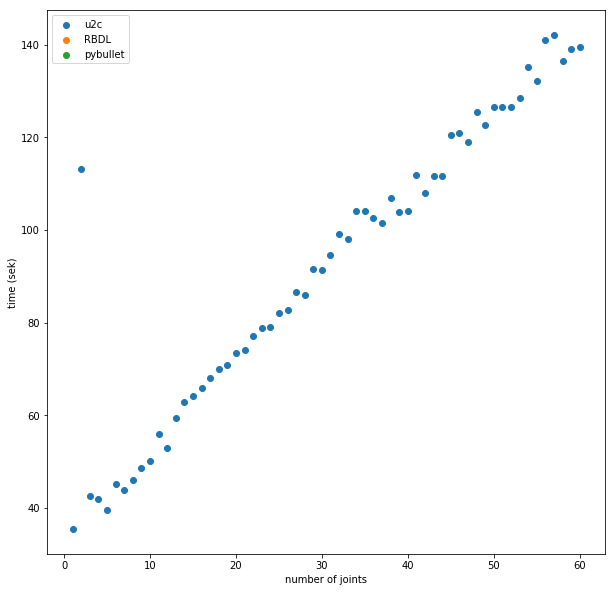

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
for i in range(ndofs):
    mediantime_u2c[i] = mediantime_u2c[i]/nitr*1000000
    #mediantime_pb[i] = mediantime_pb[i]/nitr*1000000
   # mediantime_rbdl[i] = mediantime_rbdl[i]/nitr*1000000
  #  mediantime_kdl[i] = mediantime_kdl[i]/nitr*1000000



joint_nr = list(range(ndofs + 1))
joint_nr.pop(0)
med_fig = plt.figure(figsize = (10, 10))
#plt.scatter(joint_nr, mediantime_kdl, c='lightseagreen', label='kdl')
#plt.scatter(joint_nr, mediantime_u2c, c='hotpink', label='u2c')
plt.scatter(joint_nr, mediantime_u2c, label='u2c')
plt.scatter(joint_nr, mediantime_rbdl, label='RBDL')
plt.scatter(joint_nr, mediantime_pb, label='pybullet')
plt.xlabel("number of joints")
plt.ylabel("time (sek)")
plt.legend(loc='upper left')
med_fig.show()



[Text(0,0,'pybullet'), Text(0,0,'RBDL'), Text(0,0,'U2C')]

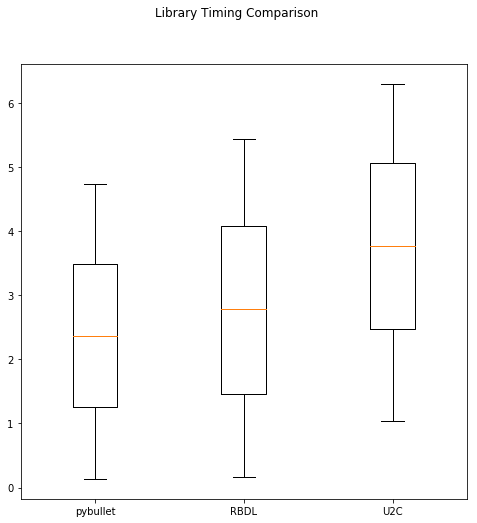

In [13]:
timing_scores = [mediantime_pb, mediantime_rbdl, mediantime_u2c]
names = ["pybullet", "RBDL", "U2C"]#, "RBDL", "pybullet"]
boxplot = plt.figure(figsize = (8, 8))
boxplot.suptitle("Library Timing Comparison")
ax = boxplot.add_subplot(111)
ax.boxplot(timing_scores)
#plt.boxplot(timing_scores)
ax.set_xticklabels(names)


In [10]:
print "mediantime_u2c = ",averagetime_u2c

print "mediantime_kdl = ",averagetime_kdl

print "mediantime_rbdl = ",averagetime_rbdl

print "mediantime_pb = ",averagetime_pb

mediantime_u2c =  [0.022227292060852052, 0.026097898483276368, 0.02807802677154541, 0.031065244674682618, 0.032143144607543944, 0.03427972316741943, 0.03619926452636719, 0.037774882316589355, 0.03959254264831543, 0.04163391590118408, 0.043749456405639646, 0.04521847248077392, 0.04723628044128418, 0.0490571928024292, 0.051919145584106444, 0.052791533470153806, 0.055014271736145016, 0.0569804573059082, 0.05819936275482178, 0.06020091056823731, 0.06190040111541748, 0.06383553504943848, 0.06577014446258544, 0.06707234859466553, 0.06856870651245117, 0.07053516387939453, 0.07265857219696045, 0.07528473854064942, 0.07735464572906495, 0.07985945701599122, 0.07905525207519531, 0.08167013645172119, 0.08363884449005127, 0.08528061389923096, 0.08688543796539307, 0.08963508605957031, 0.09122729778289795, 0.09276730537414551, 0.09537540912628174, 0.09586593151092529, 0.09858812808990479, 0.09946225643157959, 0.10154648780822755, 0.10328254222869873, 0.10604008197784424, 0.10816513061523438, 0.108814